In [4]:
import pandas as  pd 
import numpy as np


In [6]:
 df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
 ....: 'key2' : ['one', 'two', 'one', 'two', 'one'],
 ....: 'data1' : np.random.randn(5),
 ....: 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.948982,0.218650
1,a,two,1.517035,2.282774
2,b,one,-0.632323,0.418551
3,b,two,0.511540,-0.493478
4,a,one,0.064696,0.001400


In [8]:
grouped=df['data1'].groupby(df['key1'])
grouped

In [11]:
grouped.mean()

key1
a    0.843571
b   -0.060392
Name: data1, dtype: float64

In [18]:
grouped1=df['data1'].groupby([df['key1'],df['key2']]).mean()
grouped1.unstack()

key2,one,two
key1,,
a,0.506839,1.517035
b,-0.632323,0.511540


In [26]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])


In [27]:
g=df['data1'].groupby([states,years])

In [29]:
g.mean().unstack()

,2005,2006
California,1.517035,-0.632323
Ohio,0.730261,0.064696


In [31]:
df.groupby('data2').mean()

,data1
data2,
-0.493478,0.511540
0.001400,0.064696
0.218650,0.948982
0.418551,-0.632323
2.282774,1.517035


In [33]:
for name, group in df.groupby('key2'):
    print(name)
    print(group)


one
  key1 key2     data1     data2
0    a  one  0.948982  0.218650
2    b  one -0.632323  0.418551
4    a  one  0.064696  0.001400
two
  key1 key2     data1     data2
1    a  two  1.517035  2.282774
3    b  two  0.511540 -0.493478


In [35]:
df.groupby('key1')['data1'].mean()

key1
a    0.843571
b   -0.060392
Name: data1, dtype: float64

In [39]:
df['data1'].groupby(df['key1']).mean()

key1
a    0.843571
b   -0.060392
Name: data1, dtype: float64

In [42]:
people = pd.DataFrame(np.random.randn(5, 5),
 ....: columns=['a', 'b', 'c', 'd', 'e'],
 ....: index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.318478,-1.890166,-0.931430,0.051775,0.886046
Steve,0.060157,1.991903,-0.791976,0.376839,0.687192
Wes,2.156615,0.887772,-0.731113,1.076260,-1.215746
Jim,0.872859,-0.620613,-1.013957,-1.212096,-0.392987
Travis,-0.594629,1.149514,-0.280894,-0.367993,-0.572122


In [48]:
people.iloc[2:3,[1,2]]=np.nan

In [47]:
people

,a,b,c,d,e
Joe,0.318478,-1.890166,-0.931430,0.051775,0.886046
Steve,0.060157,1.991903,-0.791976,0.376839,0.687192
Wes,2.156615,NaN,NaN,1.076260,-1.215746
Jim,0.872859,-0.620613,-1.013957,-1.212096,-0.392987
Travis,-0.594629,1.149514,-0.280894,-0.367993,-0.572122


In [49]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}

In [51]:
bc=people.groupby(mapping,axis=1)

In [52]:
bc.sum()

,blue,red
Joe,-0.879655,-0.685642
Steve,-0.415137,2.739252
Wes,1.076260,0.940870
Jim,-2.226053,-0.140741
Travis,-0.648887,-0.017237


In [58]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
 ....: [1, 3, 5, 1, 3],[1, 3, 53, 1, 3]],
 ....: names=['cty', 'tenor','ran'])

In [60]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns,index=[0,1,1,1])
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
ran          1         3         53        1         3 
0      1.285173 -0.012057  0.967911 -2.528311  0.712046
1      0.727784  0.482842 -0.217296  1.453478 -0.431617
1     -2.102529 -0.023073 -1.162724 -1.469265  0.605669
1      0.150124  0.907476 -0.979093  0.294454 -1.040752

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [64]:
s=pd.Series(np.random.randn(10))
s

0    0.202217
1   -0.257263
2    0.844627
3    2.165242
4   -1.252544
5    0.028728
6    0.932730
7    0.277428
8    0.672995
9   -0.203853
dtype: float64

In [68]:
# s.quantile()
s.median()

0.23982251809377397

In [69]:
tips=pd.read_csv('tips.csv')

In [71]:
tips['tip_pct']=tips['tip']/(tips['total_bill'])

In [73]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [74]:
g1=tips.groupby(['day','smoker'])

In [79]:
for (k1,k2),group in g1:
    print(k1,k2)
    print(group)
    

Fri No
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
Fri Yes
     total_bill   tip smoker  day    time  size   tip_pct
90        28.97  3.00    Yes  Fri  Dinner     2  0.103555
92         5.75  1.00    Yes  Fri  Dinner     2  0.173913
93        16.32  4.30    Yes  Fri  Dinner     2  0.263480
95        40.17  4.73    Yes  Fri  Dinner     4  0.117750
96        27.28  4.00    Yes  Fri  Dinner     2  0.146628
97        12.03  1.50    Yes  Fri  Dinner     2  0.124688
98        21.01  3.00    Yes  Fri  Dinner     2  0.142789
100       11.35  2.50    Yes  Fri  Dinner     2  0.220264
101       15.38  3.00    Yes  Fri  Dinner     2  0.195059
220       12.16  2.20    Yes  Fri   Lunch     2  0.180921
221       13.42  3.48    Yes  Fri   Lunch     2  0.259314

In [80]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]


In [81]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [82]:
frame = pd.DataFrame({'data1': np.random.randn(1000),'data2': np.random.randn(1000)})

In [87]:
quartiles=pd.cut(frame.data1,4)

In [131]:
quartiles.cat.categories
import matplotlib.pyplot as plt
quartiles

0       (-1.298, 0.468]
1        (0.468, 2.234]
2       (-1.298, 0.468]
3       (-1.298, 0.468]
4       (-1.298, 0.468]
             ...       
995      (0.468, 2.234]
996    (-3.071, -1.298]
997      (0.468, 2.234]
998     (-1.298, 0.468]
999     (-1.298, 0.468]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.071, -1.298] < (-1.298, 0.468] < (0.468, 2.234] < (2.234, 4.001]]

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='data1', ylabel='Density'>

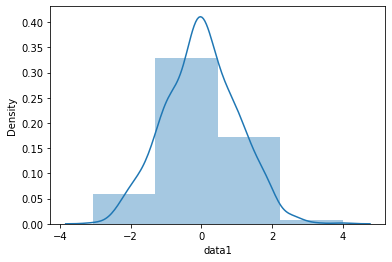

In [137]:
# plt.plot(quartiles.cat,quartiles)
quartiles.value_counts().shape
quartiles.cat.categories.shape

import seaborn as sns
# plt.hist(frame.data1,bins=[-3.071, -1.298, 0.468, 2.234, 4.001])
sns.distplot(frame.data1,bins=[-3.071, -1.298, 0.468, 2.234, 4.001])

In [138]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
 ....: 'Oregon', 'Nevada', 'California', 'Idaho']
group_key= ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)

In [140]:
d=data.groupby(group_key)

In [141]:
d.mean()

East   -0.089910
West   -0.322584
dtype: float64

In [144]:
suits=['h','s','c','d']
card_val=(list(range(1,11))+[10]*3)*4
base_names=['a']+list(range(2,11))+['j','k','q']

In [149]:
cards=[]
    

In [147]:
for suit in suits:
    cards.extend(str(num)+suit for num in base_names)
deck=pd.Series(card_val,index=cards)

In [150]:
deck.head()

ah    1
2h    2
3h    3
4h    4
5h    5
dtype: int64

In [151]:
def draw(deck,n=5):
    return deck.sample(n)

In [152]:
draw(deck)

9s     9
jd    10
3h     3
as     1
2h     2
dtype: int64

In [153]:
get_suit=lambda card:card[-1]
deck.groupby(get_suit).apply(draw,n=2)

c  8c      8
   7c      7
d  10d    10
   jd     10
h  4h      4
   5h      5
s  2s      2
   8s      8
dtype: int64

In [157]:
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [161]:
def return_val(g):
    return g
a=tips.groupby(['day','smoker'])

In [163]:
a.mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [196]:
sample=pd.DataFrame(np.arange(1,11))


In [197]:
sample['Nationality']=pd.Series(['USA','JAPAN','USA','JAPAN','JAPAN','JAPAN',"USA",'USA','JAPAN','USA'])


In [194]:
h=['Rh','Lh']
a=np.random.choice(h,size=(1,10))
a=a.tolist()[0]

In [206]:
sample['hand']=a

In [211]:
sample

,0,Nationality,hand
0,1,USA,Lh
1,2,JAPAN,Rh
2,3,USA,Rh
3,4,JAPAN,Lh
4,5,JAPAN,Rh
5,6,JAPAN,Lh
6,7,USA,Rh
7,8,USA,Lh
8,9,JAPAN,Lh
9,10,USA,Rh


In [212]:
sample.groupby(['Nationality'])

In [213]:
pd.crosstab(sample.Nationality,data.hasnans)

col_0,False
Nationality,
JAPAN,5
USA,5


In [214]:
from datetime import datetime
now=datetime.now()

In [216]:
stamp=now


In [217]:
stamp.strftime('%Y-%m-%d')

'2022-06-11'

In [218]:
val='2022-06-11'
datetime.strptime(val,"%Y-%m-%d")

datetime.datetime(2022, 6, 11, 0, 0)

In [222]:
from dateutil.parser import parse
parse('2011-11-03')
datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']


In [223]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
 ....: datetime(2011, 1, 7), datetime(2011, 1, 8),
 ....: datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [224]:
ts = pd.Series(np.random.randn(6), index=dates)


In [225]:
ts

2011-01-02   -2.082792
2011-01-05   -0.478989
2011-01-07   -0.730146
2011-01-08    0.065634
2011-01-10   -0.572213
2011-01-12    0.979971
dtype: float64

In [226]:
longer_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))

In [227]:
ts['2011-01-07']

-0.7301458515111013

In [228]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.730146
2011-01-08    0.065634
2011-01-10   -0.572213
dtype: float64

In [229]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [230]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [231]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
 ....: '1/2/2000', '1/3/2000'])

In [232]:
dup_ts=pd.Series(np.arange(5),index=dates)

In [233]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [235]:
dup_ts.index.is_unique

False

In [237]:
dup_ts['01-02-2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [238]:
ts

2011-01-02   -2.082792
2011-01-05   -0.478989
2011-01-07   -0.730146
2011-01-08    0.065634
2011-01-10   -0.572213
2011-01-12    0.979971
dtype: float64

In [241]:
p=ts.resample('D')

In [247]:
dr=pd.date_range('27-04-2022',datetime.now(),freq='D')

In [248]:
len(dr)

47

In [277]:
a=pd.date_range('27-04-2022 9:30',datetime.now(),freq='W-WED')

In [278]:

import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [279]:
a

DatetimeIndex(['2022-04-27 09:30:00', '2022-05-04 09:30:00',
               '2022-05-11 09:30:00', '2022-05-18 09:30:00',
               '2022-05-25 09:30:00', '2022-06-01 09:30:00',
               '2022-06-08 09:30:00'],
              dtype='datetime64[ns]', freq='W-WED')

In [280]:

s=pd.Series(np.random.randn(7),index=a)

# a.tz_localize('UTC')

In [282]:
s.tz_localize('UTC')

2022-04-27 09:30:00+00:00    1.433918
2022-05-04 09:30:00+00:00    1.213849
2022-05-11 09:30:00+00:00   -1.262546
2022-05-18 09:30:00+00:00    0.046236
2022-05-25 09:30:00+00:00   -0.689971
2022-06-01 09:30:00+00:00   -1.826821
2022-06-08 09:30:00+00:00    0.273077
Freq: W-WED, dtype: float64

In [283]:
ts_e=ts.tz_localize('America/New_York')

In [286]:
ts_b=ts_e.tz_convert('Europe/Berlin')

In [287]:
ts_b

2011-01-02 06:00:00+01:00   -2.082792
2011-01-05 06:00:00+01:00   -0.478989
2011-01-07 06:00:00+01:00   -0.730146
2011-01-08 06:00:00+01:00    0.065634
2011-01-10 06:00:00+01:00   -0.572213
2011-01-12 06:00:00+01:00    0.979971
dtype: float64

In [292]:
r=pd.date_range('2/7/2090','2/8/2091',periods=10)

In [293]:
r

DatetimeIndex(['2090-02-07 00:00:00', '2090-03-19 16:00:00',
               '2090-04-29 08:00:00', '2090-06-09 00:00:00',
               '2090-07-19 16:00:00', '2090-08-29 08:00:00',
               '2090-10-09 00:00:00', '2090-11-18 16:00:00',
               '2090-12-29 08:00:00', '2091-02-08 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [294]:
ts=pd.Series(np.random.randn(len(r)),index=r)

In [295]:
ts

2090-02-07 00:00:00    0.520633
2090-03-19 16:00:00   -1.334728
2090-04-29 08:00:00    0.636135
2090-06-09 00:00:00    1.224588
2090-07-19 16:00:00    0.077365
2090-08-29 08:00:00   -0.860527
2090-10-09 00:00:00    0.490514
2090-11-18 16:00:00    2.259379
2090-12-29 08:00:00    0.076362
2091-02-08 00:00:00    2.873414
dtype: float64

In [296]:
p=pd.Period(2007)

In [297]:
p

Period('2007', 'A-DEC')

In [298]:
p=pd.Period('2007',freq='A-JUN')

In [299]:
p

Period('2007', 'A-JUN')

In [301]:

p.asfreq('M',how='start')

Period('2006-07', 'M')

In [302]:
 rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [303]:
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-JAN]')

In [304]:
d=pd.read_csv("macrodata.csv")

In [306]:
d.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [307]:
d.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [308]:
index=pd.PeriodIndex(year=d.year,quarter=d.quarter,freq='Q-DEC')

In [309]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [311]:
d.index=index

In [312]:
d

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [317]:
a=[1999,2000,2001,2002]
s=pd.Series(a)
a=pd.PeriodIndex(s,freq='B')

In [318]:
a

PeriodIndex(['1999-01-01', '2000-01-03', '2001-01-01', '2002-01-01'], dtype='period[B]')

In [325]:
frame=pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
               columns=['Colorado','Texas','New York','Ohio'])

In [327]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.366119,-0.577251,0.319890,3.032773
2000-01-12,0.770504,1.585778,-2.113978,0.588237


In [329]:
f=frame.resample('D').asfreq()

In [332]:
f.ffill()#forward fill

,Colorado,Texas,New York,Ohio
2000-01-05,0.366119,-0.577251,0.319890,3.032773
2000-01-06,0.366119,-0.577251,0.319890,3.032773
2000-01-07,0.366119,-0.577251,0.319890,3.032773
2000-01-08,0.366119,-0.577251,0.319890,3.032773
2000-01-09,0.366119,-0.577251,0.319890,3.032773
2000-01-10,0.366119,-0.577251,0.319890,3.032773
2000-01-11,0.366119,-0.577251,0.319890,3.032773
2000-01-12,0.770504,1.585778,-2.113978,0.588237


In [344]:
a=pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'
                                                          ), columns=['Colorado','Texas','New York','Ohio'])

In [345]:
annual=a.resample('A-DEC')

In [346]:
annual.mean()

,Colorado,Texas,New York,Ohio
2000,-0.530837,-0.094446,-0.238033,-0.097283
2001,-0.424398,0.108523,-0.200867,0.265240


In [372]:
s2=pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
s2.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [373]:
cp=s2[['AAPL','MSFT','XOM']]


In [374]:
cp=cp.resample('B').ffill()

In [375]:
cp

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

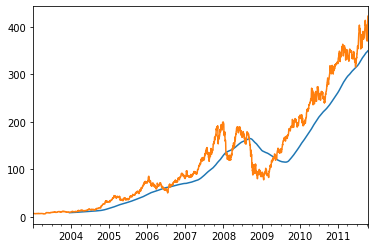

In [377]:
cp.AAPL.rolling(250).mean().plot()
cp.AAPL.plot()

<AxesSubplot:>

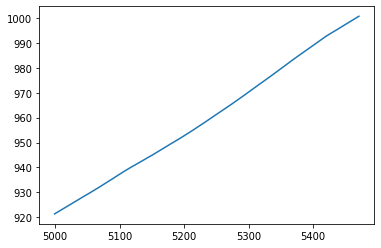

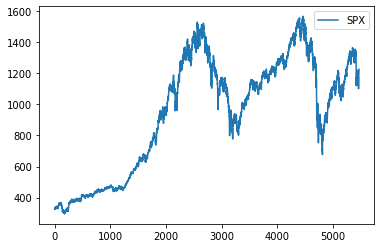

In [392]:

stock=pd.read_csv('spx.csv')
stock.head()

stock.SPX.rolling(5000).mean().plot()
stock.plot()

In [389]:
len(stock)

5472

In [399]:

apl250=s2.AAPL.rolling(250,min_periods=10).std()

<AxesSubplot:>

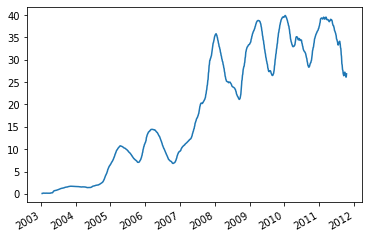

In [400]:
apl250.plot()

In [408]:


p=pd.period_range('1/1/2007','1/1/2008',freq='M')

In [413]:
m=cp['2006':'2007'].rolling(30,min_periods=20).mean()

In [416]:
m.ewm(span=30).mean()
spx=pd.read_csv('spx.csv')

In [418]:
spx

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75
...,...,...
5467,2011-10-10 00:00:00,1194.89
5468,2011-10-11 00:00:00,1195.54
5469,2011-10-12 00:00:00,1207.25
5470,2011-10-13 00:00:00,1203.66


In [419]:
s=s2['SPX']

In [422]:
s_r=s.pct_change()
ret=cp.pct_change()

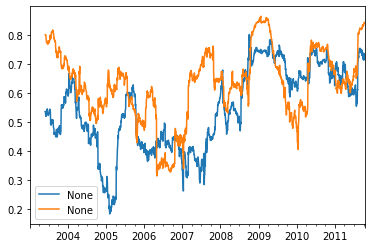

In [427]:
corr=ret.AAPL.rolling(125,min_periods=100).corr(s_r)
corr.plot()
corr2=ret.MSFT.rolling(125,min_periods=100).corr(s_r)
corr2.plot()
plt.legend(loc='best')

<AxesSubplot:>

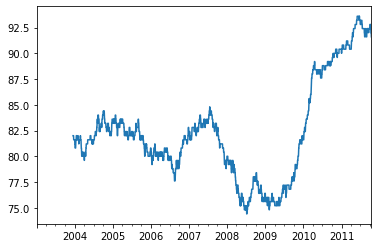

In [429]:
from scipy.stats import percentileofscore
score_at_2percent=lambda x:percentileofscore(x,0.02)
resilt=ret.AAPL.rolling(250).apply(score_at_2percent)
resilt.plot()